In [18]:
import json
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

import audb

# Repository at https://gitlab.audeering.com/ureichel/split-utils
PROJECT_DIR = '/home/audeering.local/aderington/Workspace/split-utils'
sys.path.append(PROJECT_DIR)

from split_utils import optimize_traindevtest_split


In [19]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
def vis_hist(df, x='emotion', hue=None, hue_order=None, title=None):
    fig = plt.figure(figsize=(24,8))
    ax = fig.add_subplot(111)
    sns.histplot(data=df, x=x, hue=hue, ax=ax, multiple='dodge', hue_order=hue_order, shrink=.8)
    if title is not None:
        ax.set_title(title)
    if hue is not None:
        move_legend(ax, "center left", bbox_to_anchor=(1., 0.5), ncol=3, title_fontsize=14)
    plt.tight_layout()

In [20]:
# Parse sample dataframe with speaker information

source_dir = 'emozionalmente_dataset'

user_path = os.path.join(source_dir, 'metadata', 'users.csv')
samples_path = os.path.join(source_dir, 'metadata', 'samples.csv')
evaluations_path = os.path.join(source_dir, 'metadata', 'evaluations.csv')

user_df = pd.read_csv(user_path)
user_df.set_index('username', inplace=True)
full_samples_df = pd.read_csv(samples_path)
full_samples_df = full_samples_df.merge(user_df, left_on='actor', right_on='username')
evaluations_df = pd.read_csv(evaluations_path)

full_samples_df

,file_name,sentence,sentence_language,actor,emotion_expressed,gender,age,mother_tongue
0,1614951631538.wav,E’ andato a scuola dopo pranzo,italian,d4bbc5043503b9aed309ede00854ee48937684b57a1cc0...,anger,female,25,italian
1,1615576406958.wav,Non sapevo che fosse in città,italian,d4bbc5043503b9aed309ede00854ee48937684b57a1cc0...,anger,female,25,italian
2,1613849793808.wav,La cascata fa molto rumore,italian,d4bbc5043503b9aed309ede00854ee48937684b57a1cc0...,anger,female,25,italian
3,1613849611491.wav,Vado in biblioteca,italian,d4bbc5043503b9aed309ede00854ee48937684b57a1cc0...,anger,female,25,italian
4,1613849909783.wav,Il cane ha riportato qui la palla,italian,d4bbc5043503b9aed309ede00854ee48937684b57a1cc0...,anger,female,25,italian
...,...,...,...,...,...,...,...,...
6897,1616021287911.wav,Non sapevo che fosse in città,italian,e0190e29f051195b1560835724d45d4b0ed3d873a56323...,sadness,female,21,italian
6898,1614676948255.wav,Il capo mi ha affidato un altro lavoro,italian,b078ddf0835cf281d6231fe35a9a21ebbc2f31a8504e8f...,sadness,female,47,italian
6899,1616014562918.wav,Zia Marta ha detto che devo stare a casa stasera,italian,ac569504468a79d8d98fea1e1868f6825dfd16a33e8bf1...,surprise,male,17,italian
6900,1616014503606.wav,E’ una notte stellata,italian,ac569504468a79d8d98fea1e1868f6825dfd16a33e8bf1...,surprise,male,17,italian


In [21]:
def gold_standard(votes):
    mode = pd.Series.mode(votes)
    if len(mode)==1:
        return mode
    else:
        return 'no_agreement'

emotion_gold_standard = evaluations_df.groupby('file_name')['emotion_recognized'].agg(
    gold_standard
)

full_samples_df = full_samples_df.merge(emotion_gold_standard, on='file_name')

In [22]:
full_samples_df['age_decade'] = full_samples_df['age'].apply(lambda x: int(np.floor(x/10) * 10))
full_samples_df

,file_name,sentence,sentence_language,actor,emotion_expressed,gender,age,mother_tongue,emotion_recognized,age_decade
0,1614951631538.wav,E’ andato a scuola dopo pranzo,italian,d4bbc5043503b9aed309ede00854ee48937684b57a1cc0...,anger,female,25,italian,no_agreement,20
1,1615576406958.wav,Non sapevo che fosse in città,italian,d4bbc5043503b9aed309ede00854ee48937684b57a1cc0...,anger,female,25,italian,surprise,20
2,1613849793808.wav,La cascata fa molto rumore,italian,d4bbc5043503b9aed309ede00854ee48937684b57a1cc0...,anger,female,25,italian,anger,20
3,1613849611491.wav,Vado in biblioteca,italian,d4bbc5043503b9aed309ede00854ee48937684b57a1cc0...,anger,female,25,italian,anger,20
4,1613849909783.wav,Il cane ha riportato qui la palla,italian,d4bbc5043503b9aed309ede00854ee48937684b57a1cc0...,anger,female,25,italian,anger,20
...,...,...,...,...,...,...,...,...,...,...
6897,1616021287911.wav,Non sapevo che fosse in città,italian,e0190e29f051195b1560835724d45d4b0ed3d873a56323...,sadness,female,21,italian,sadness,20
6898,1614676948255.wav,Il capo mi ha affidato un altro lavoro,italian,b078ddf0835cf281d6231fe35a9a21ebbc2f31a8504e8f...,sadness,female,47,italian,sadness,40
6899,1616014562918.wav,Zia Marta ha detto che devo stare a casa stasera,italian,ac569504468a79d8d98fea1e1868f6825dfd16a33e8bf1...,surprise,male,17,italian,no_agreement,10
6900,1616014503606.wav,E’ una notte stellata,italian,ac569504468a79d8d98fea1e1868f6825dfd16a33e8bf1...,surprise,male,17,italian,surprise,10


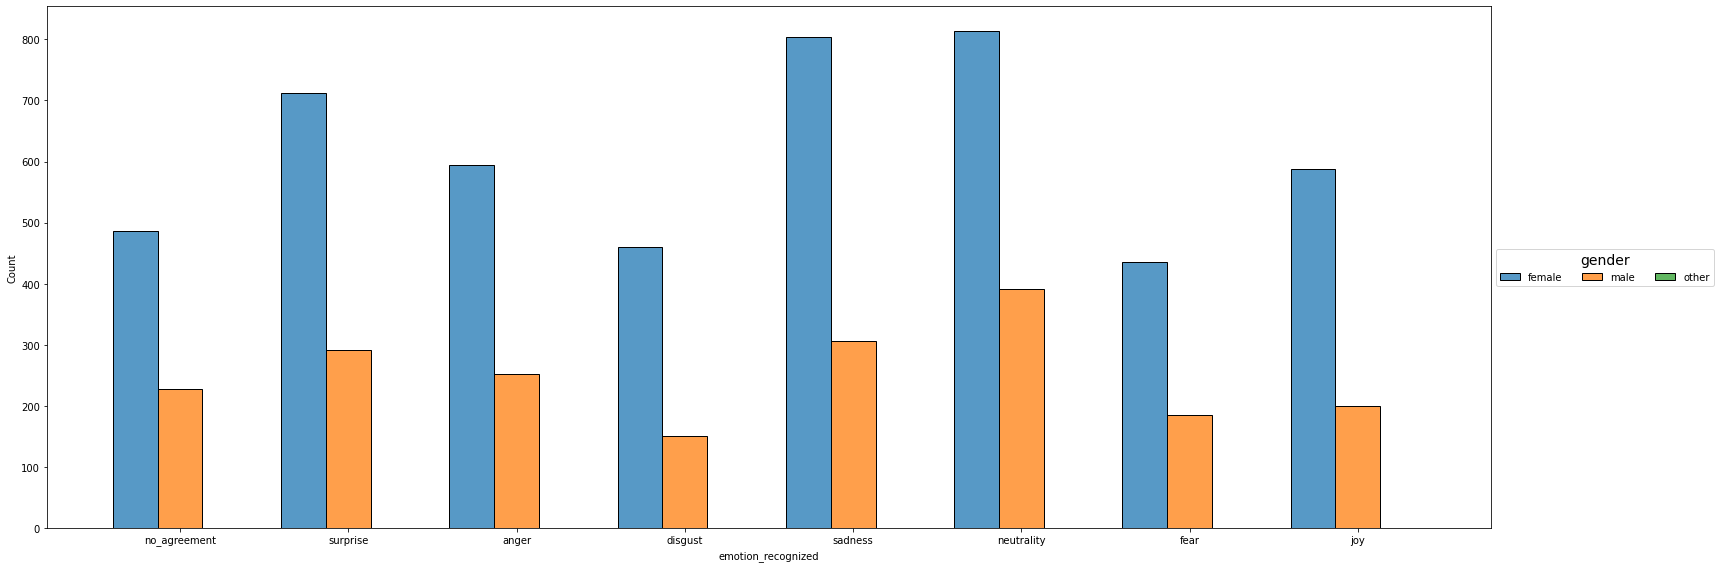

In [23]:
vis_hist(full_samples_df, x='emotion_recognized', hue='gender')

In [24]:
full_samples_df['gender'].value_counts()

female    4891
male      2008
other        3
Name: gender, dtype: int64

In [25]:
# There are 3 samples of a speaker with gender 'other'.
# Remove from df for now so that a split can be created

samples_df = full_samples_df[~full_samples_df['gender'].isin(['other'])]

In [26]:
samples_df['gender'].value_counts()

female    4891
male      2008
Name: gender, dtype: int64

In [27]:
speaker = samples_df['actor'].to_numpy()
emotion =  samples_df['emotion_recognized'].to_numpy()

stratif_vars = {
    "emotion_recognized": emotion,
    "gender": samples_df['gender'].to_numpy(),
    "age_decade": samples_df['age_decade'].to_numpy(),
}
weight =  {
    "emotion_recognized": 1,
    "gender": 2,
    "age_decade": 1,
    "size_diff": 1
}


In [28]:
train_i, dev_i, test_i, info = optimize_traindevtest_split(
    X=samples_df, y=emotion,
    split_on=speaker,
    stratify_on=stratif_vars,
    weight=weight,
    dev_size=0.2,
    test_size=0.2,
    k=100, seed=1
)
display(train_i, dev_i, test_i, info)

array([  68,   69,   70, ..., 6891, 6893, 6898])

array([   0,    1,    2, ..., 6895, 6896, 6897])

array([ 189,  190,  191, ..., 6884, 6885, 6889])

{'score': 0.032742907148508346,
 'size_devset_in_spliton': 0.2,
 'size_devset_in_X': 0.24,
 'size_testset_in_spliton': 0.2,
 'size_testset_in_X': 0.18,
 'p_emotion_recognized_ref': {'no_agreement': 0.10349325989273808,
  'surprise': 0.14552833744020874,
  'anger': 0.12262646760400057,
  'disgust': 0.08870850847948979,
  'sadness': 0.16089288302652557,
  'neutrality': 0.17451804609363675,
  'fear': 0.09001304536889404,
  'joy': 0.11421945209450644},
 'p_emotion_recognized_dev': {'no_agreement': 0.10260972716488731,
  'surprise': 0.15302491103202848,
  'anger': 0.12930011862396204,
  'disgust': 0.09430604982206406,
  'sadness': 0.16725978647686832,
  'neutrality': 0.16251482799525505,
  'fear': 0.08066429418742586,
  'joy': 0.1103202846975089},
 'p_emotion_recognized_test': {'anger': 0.12244897959183673,
  'fear': 0.09142857142857143,
  'disgust': 0.09795918367346938,
  'no_agreement': 0.10775510204081633,
  'sadness': 0.1657142857142857,
  'joy': 0.11428571428571428,
  'neutrality': 0.1

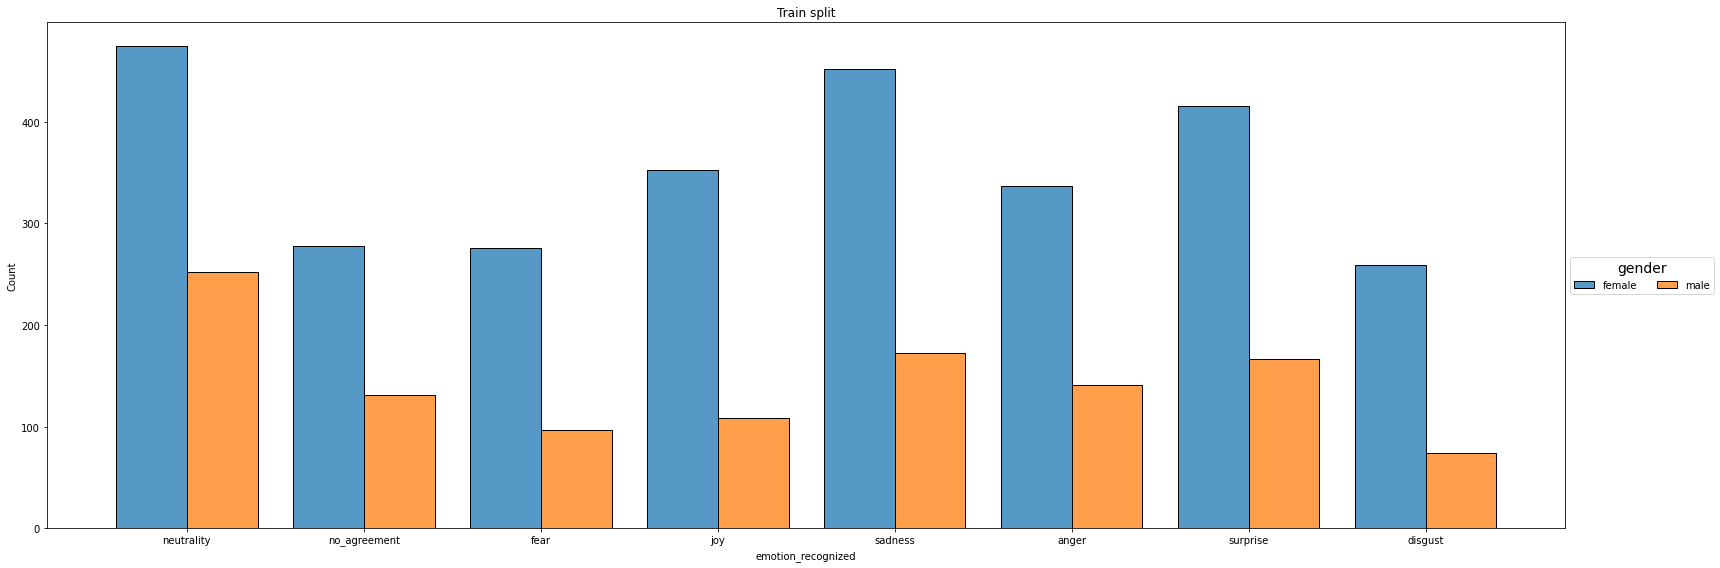

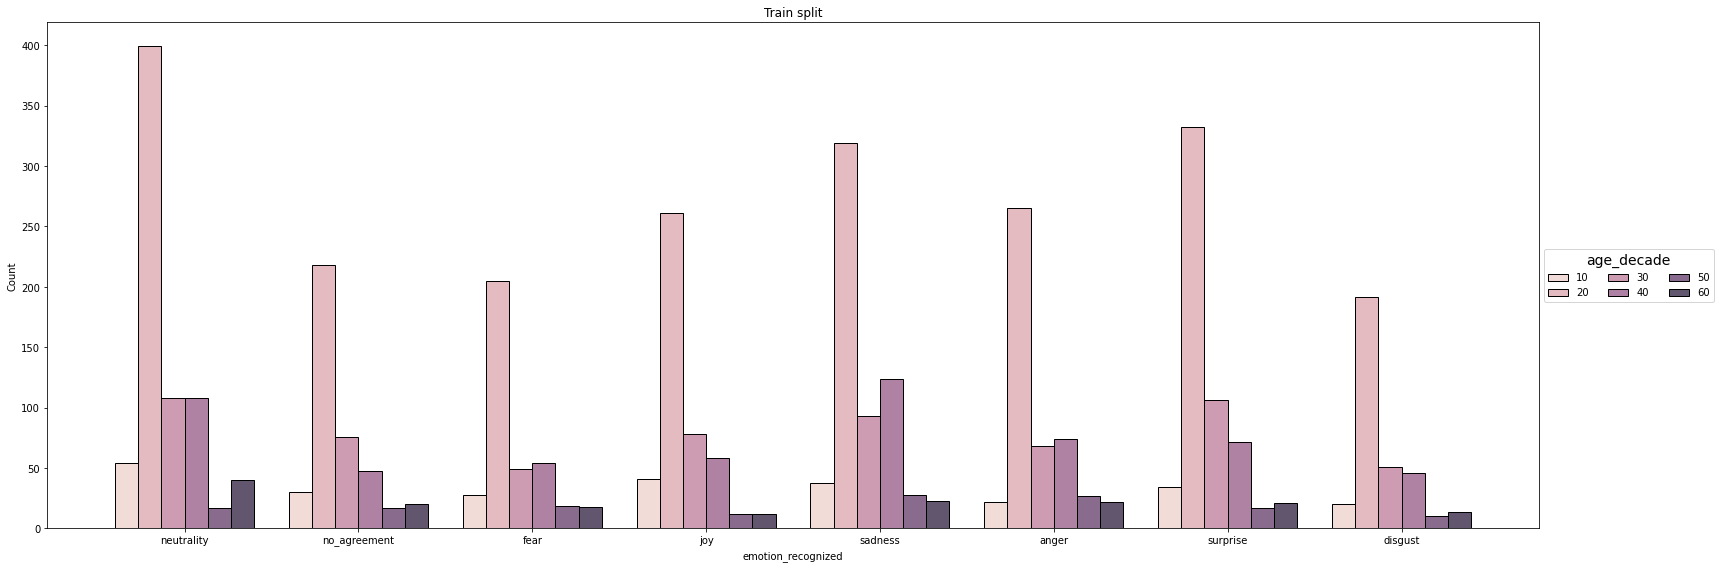

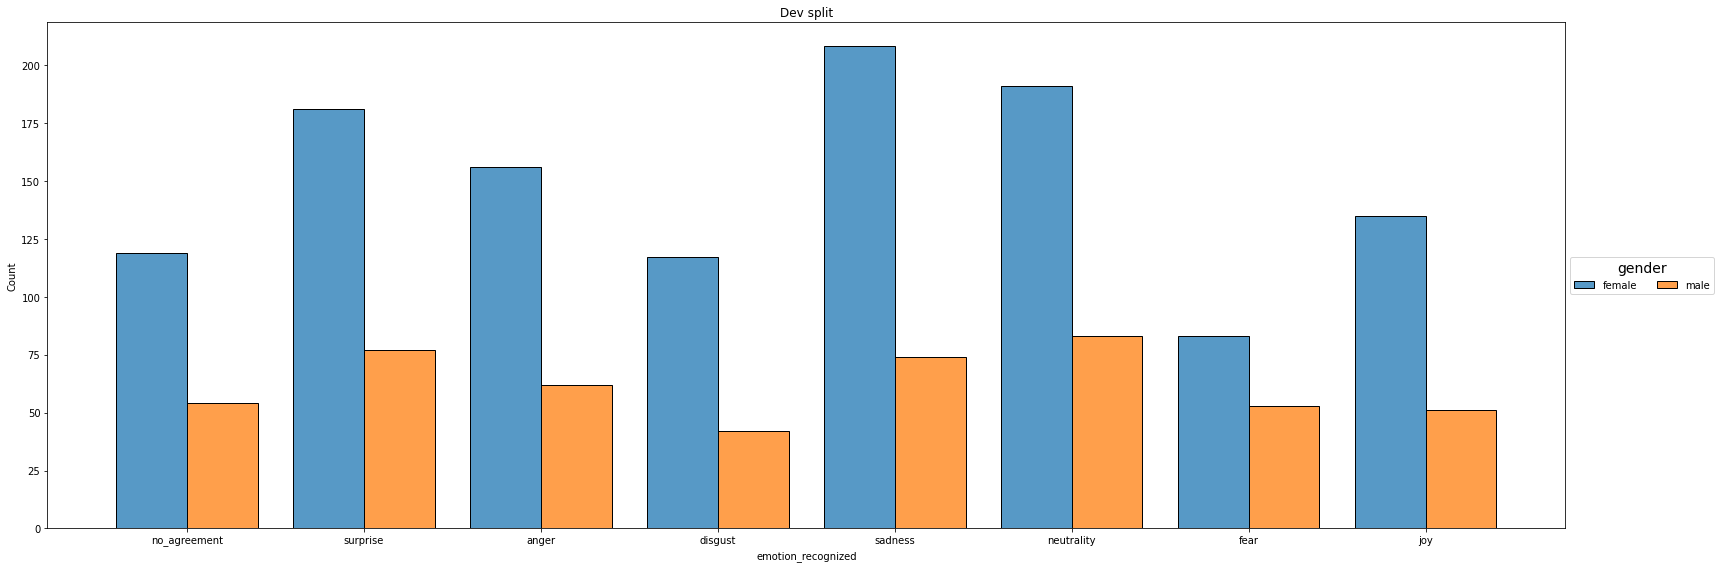

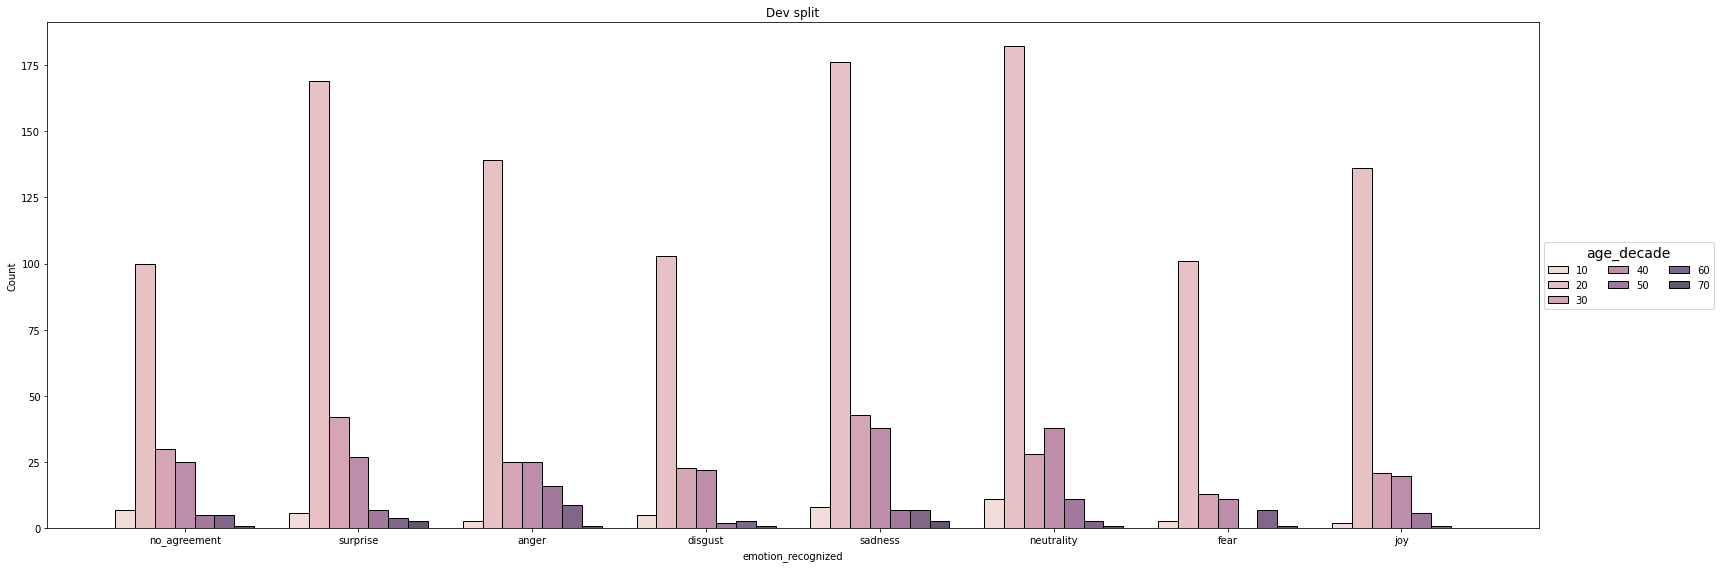

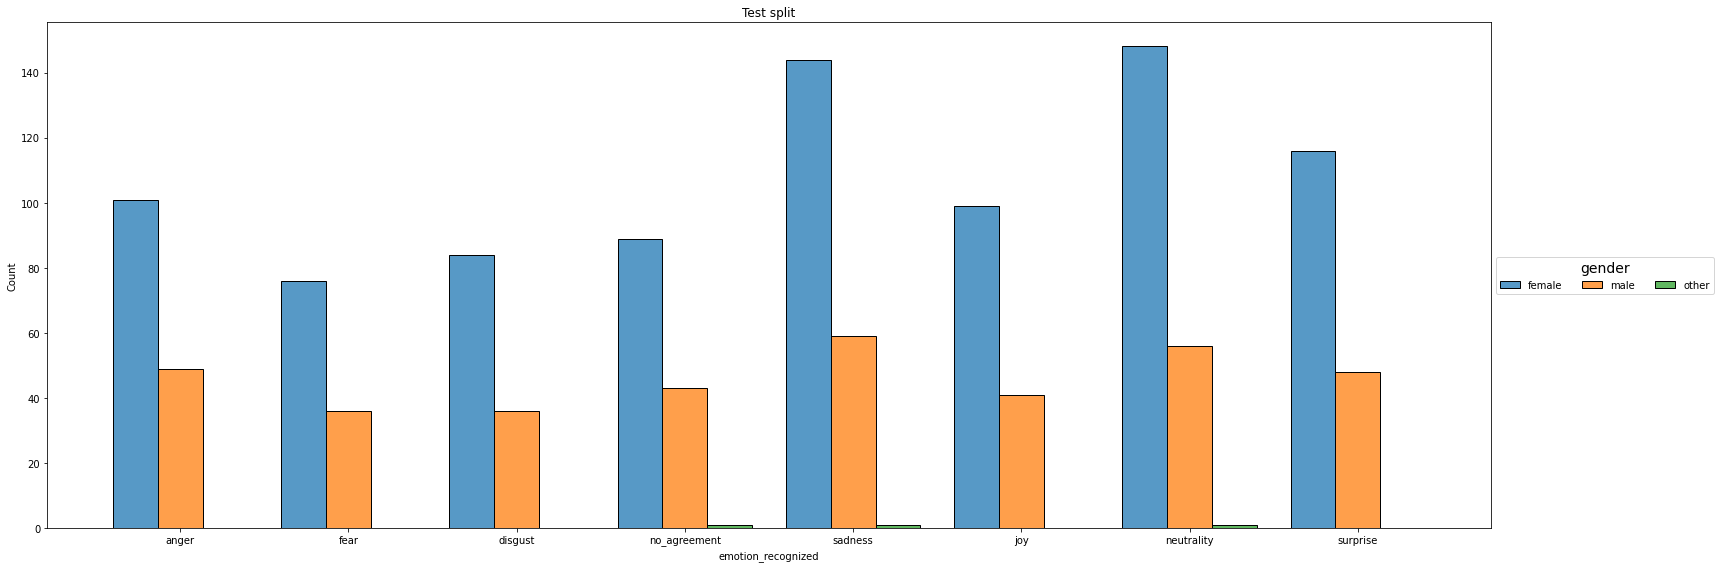

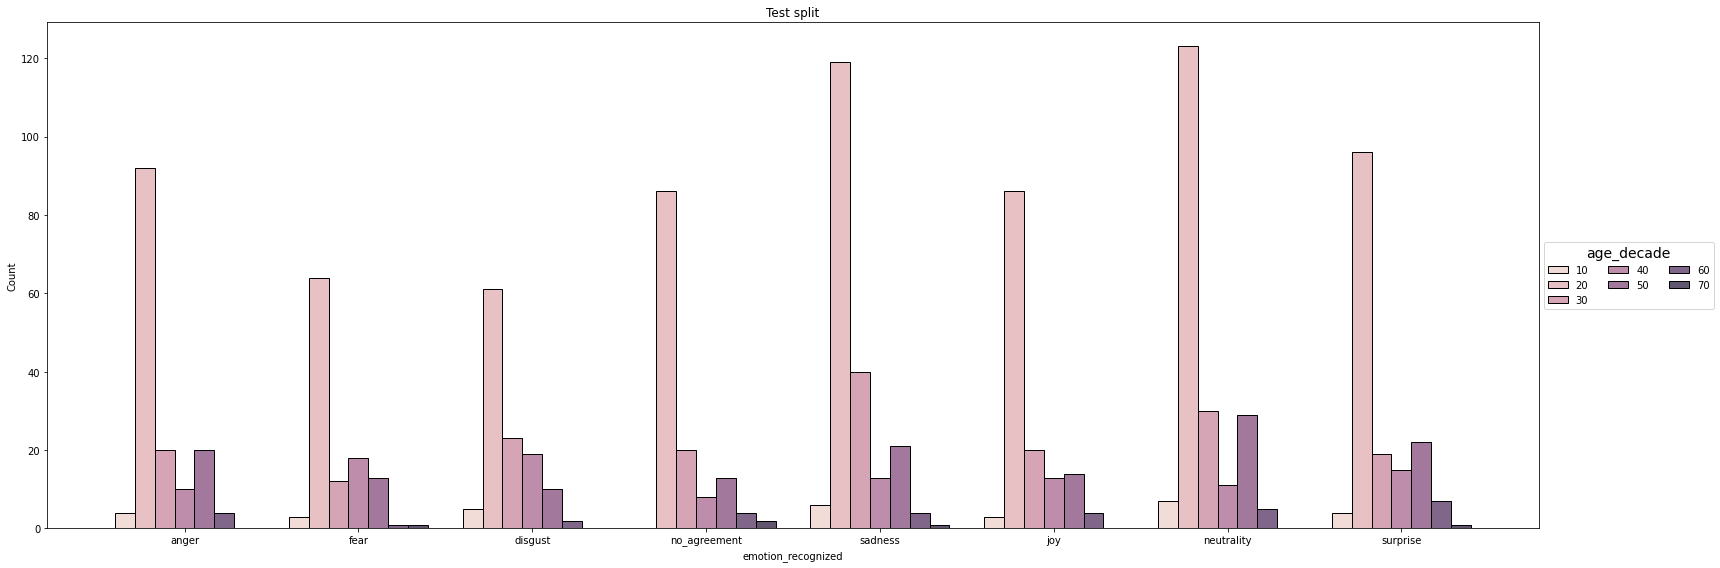

In [32]:
train_df = samples_df.iloc[train_i]
dev_df = samples_df.iloc[dev_i]
test_df = samples_df.iloc[test_i]
# Add previously removed files with gender 'other' back to test split
test_df = pd.concat((test_df, full_samples_df[full_samples_df['gender'].isin(['other'])]))

for split, df in zip(['train', 'dev', 'test'], [train_df, dev_df, test_df]):
    vis_hist(df, x='emotion_recognized', hue='gender', title=f'{split.capitalize()} split')
    vis_hist(df, x='emotion_recognized', hue='age_decade', title=f'{split.capitalize()} split')

In [38]:
# Save speaker splits to json file
speaker_splits = {
    'train': list(train_df['actor'].unique()),
    'dev': list(dev_df['actor'].unique()),
    'test': list(test_df['actor'].unique())
}
assert len(set(speaker_splits['train']).intersection(set(speaker_splits['dev']))) == 0
assert len(set(speaker_splits['train']).intersection(set(speaker_splits['test']))) == 0
assert len(set(speaker_splits['dev']).intersection(set(speaker_splits['test']))) == 0

with open('speaker_splits.json', 'w') as fp:
    json.dump(speaker_splits, fp)

speaker_splits

{'train': ['b830cbf6e79aeeeec1fbf2ef3be741628ffc574c9b15f30634b8e8cc56bd17b9',
  '5b8476bb94a4a1a17df32b417ec035029f48e4487c9055203fb02353eccd46a1',
  'f78d765ec69ed2306cf544ae70b352f27ac00ced795ad5a4014e480d6f653395',
  '33fae0227059f08853c11257fe73f4976d4527614588b9b30289c213fea025c9',
  'b3c7c357c77848765caaded035be8800169fb4dc53996f78ed5b0b24403427f4',
  '9168b364a8f5456e8e2a5f2666ae4c0541fafe4bf87cdd15f4ad13b3459dd23a',
  'e7d486b923ff5d70ab28d1f0383f613f4e2d4e02514966f3ff6cdc7446b2f3cd',
  '2dcd7cd5193e3cf64ec3bedf3bcdf4b8e91acf472550053bf6c6436bb9871b08',
  '4aa97df0f04f62f7f564695f551e2f7f0c38fa4a9ced680b5f5e2e403648fcca',
  'f8710902ce31a673185ffd93d3140f32bea4098fee10e39532557626b4d05efb',
  'da69a545ccd6500d3d5ef76d48c097ac794b42b4570edd2eb00e539c0667ce10',
  '415eb3920eb4b3d4645eb42bae62fd32cdd3e731c2662cbb0d480c3792b43066',
  '5dfd46e27a5e3e8e06fcb92817b0955f7fd28048f5003bfd4e5be8e67bf417db',
  '509ce83c88888f7d75edabc19670ab07530413773ce7be5c2aee2a6b98638de7',
  '7a49d0e3